Company XYZ is an online grocery store. In the current version of the website, they have manually grouped the items into a few categories based on their experience.
However, they now have a lot of data about user purchase history. Therefore, they would like to put the data into use!

This is what they asked you to do:
* The company founder wants to meet with some of the best customers to go through a focus group with them. You are asked to send the ID of the following customers to the founder:
    * the customer who bought the most items overall in her lifetime
    * for each item, the customer who bought that product the most
* luster items based on user co-purchase history. That is, create clusters of products that have the highest probability of being bought together. The goal of this is to replace the old/manually created categories with these new ones. Each item can belong to just one cluster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('purchase_history.csv')
df_item = pd.read_csv('item_to_id.csv')

In [3]:
df.head(10)

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."
5,409803,"43,29,8,37,23,45"
6,1296632,"18,15,31,11,20,32,25,6,47"
7,748280,"14,43,6,20,7,42,41,28,10,22,46"
8,31625,"1,43,31,37,25,32,28,35"
9,987613,"27,1,3,2,11,45,10,44,15"


In [4]:
df_item.head(10)

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39
5,dinner rolls,37
6,tortillas,34
7,bagels,13
8,canned vegetables,28
9,spaghetti sauce,26


### Build user&item count matrix

In [5]:
def item_counts_by_user(same_user_df):
    # 'sum' here is adding two lists into one big list
    all_item_ids = same_user_df['id'].str.split(',').sum()
    # transform from string to int, make it easier to be sorted later
    return pd.Series(Counter(int(id) for id in all_item_ids))

In [6]:
user_item = df.groupby("user_id").apply(item_counts_by_user).unstack(fill_value=0)

In [7]:
user_item

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1499778,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1499797,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1


##  Question 01: You are asked to send the ID of the following customers to the founder:

### (1) the customer who bought the most items overall in her lifetime

In [8]:
buy_most_user = user_item.sum(axis=1).reset_index().rename(columns={0:'count'})
buy_most_user.sort_values(by='count', ascending=False)[:5]

,user_id,count
4445,269335,72
6111,367872,70
6623,397623,64
9918,599172,64
6291,377284,63


* user_id 269335 bought the most items, 72 items

### (2) for each item, the customer who bought that product the most

In [10]:
max_user_temp = user_item.apply(lambda s: pd.Series([user_item.iloc[s.argmax()].reset_index().columns[1], s.max()], index=["max_user", "max_count"]))
max_user_temp = max_user_temp.T
max_user_temp = max_user_temp.reset_index().rename(columns={'index':'item_id'})
max_user_temp

,item_id,max_user,max_count
0,1,31625,4
1,2,31625,5
2,3,154960,4
3,4,5289,3
4,5,217277,3
5,6,334664,4
6,7,175865,3
7,8,151926,3
8,9,269335,4
9,10,618914,4


In [82]:
buy_most_user_per_item = pd.merge(left=df_item, right=max_user_temp, left_on='Item_id', right_on='item_id', how='left')
buy_most_user_per_item =buy_most_user_per_item.drop(labels='Item_id',axis=1).sort_values(by='item_id').set_index('item_id')
buy_most_user_per_item

,Item_name,max_user,max_count
item_id,,,
1,sugar,31625,4
2,lettuce,31625,5
3,pet items,154960,4
4,baby items,5289,3
5,waffles,217277,3
6,poultry,334664,4
7,sandwich bags,175865,3
8,butter,151926,3
9,soda,269335,4


## Question 02: 
* Cluster items based on user co-purchase history. That is, create clusters of products that have the highest probability of being bought together. The goal of this is to replace the old/manually created categories with these new ones. Each item can belong to just one cluster.

### Build a Similarity matrix

In [83]:
# normalization
A = normalize(user_item.values, axis=0)

# build up a similarity matrix
item_item_similarity = A.T.dot(A)
item_item_similarity = pd.DataFrame(item_item_similarity, index=user_item.columns, columns=user_item.columns)

In [84]:
item_item_similarity

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
1,1.000000,0.506895,0.420145,0.296986,0.271132,0.388250,0.271743,0.335303,0.403690,0.390641,...,0.388034,0.390286,0.358599,0.393056,0.395696,0.396766,0.390253,0.394998,0.392164,0.328221
2,0.506895,1.000000,0.466874,0.322744,0.285125,0.468199,0.312200,0.390521,0.464872,0.527894,...,0.462968,0.462548,0.409401,0.529100,0.464579,0.527325,0.521058,0.462407,0.460257,0.380077
3,0.420145,0.466874,1.000000,0.277325,0.224537,0.358326,0.238133,0.301868,0.362091,0.352597,...,0.351093,0.368199,0.309078,0.357794,0.351209,0.362522,0.361922,0.354933,0.351832,0.297972
4,0.296986,0.322744,0.277325,1.000000,0.162860,0.247414,0.166012,0.216166,0.252662,0.258313,...,0.245623,0.261272,0.210767,0.244946,0.253282,0.253119,0.250190,0.253835,0.260541,0.218717
5,0.271132,0.285125,0.224537,0.162860,1.000000,0.233618,0.164699,0.203245,0.239445,0.234254,...,0.235543,0.238557,0.211006,0.238466,0.235064,0.241835,0.238087,0.238247,0.232387,0.188269
6,0.388250,0.468199,0.358326,0.247414,0.233618,1.000000,0.267042,0.326704,0.385393,0.376518,...,0.376262,0.381924,0.338488,0.387834,0.382688,0.381860,0.390638,0.380686,0.496062,0.321075
7,0.271743,0.312200,0.238133,0.166012,0.164699,0.267042,1.000000,0.219365,0.256647,0.250765,...,0.249702,0.255744,0.229961,0.265111,0.250892,0.254311,0.255302,0.253011,0.253393,0.209766
8,0.335303,0.390521,0.301868,0.216166,0.203245,0.326704,0.219365,1.000000,0.319041,0.338472,...,0.320496,0.323186,0.279745,0.333141,0.313641,0.323224,0.327157,0.319095,0.320625,0.357460
9,0.403690,0.464872,0.362091,0.252662,0.239445,0.385393,0.256647,0.319041,1.000000,0.381207,...,0.375891,0.386393,0.334481,0.380174,0.486471,0.378158,0.376156,0.387666,0.380764,0.311454
10,0.390641,0.527894,0.352597,0.258313,0.234254,0.376518,0.250765,0.338472,0.381207,1.000000,...,0.381372,0.380613,0.333471,0.488734,0.372790,0.483275,0.483897,0.384714,0.381086,0.327807


In [92]:
# determine the best number of clusters
clusters = range(2, 30)
inertias = []
silhouettes = []

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_jobs=-1)
    kmeans = kmeans.fit(item_item_similarity)
    label = kmeans.predict(item_item_similarity)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(item_item_similarity, label))

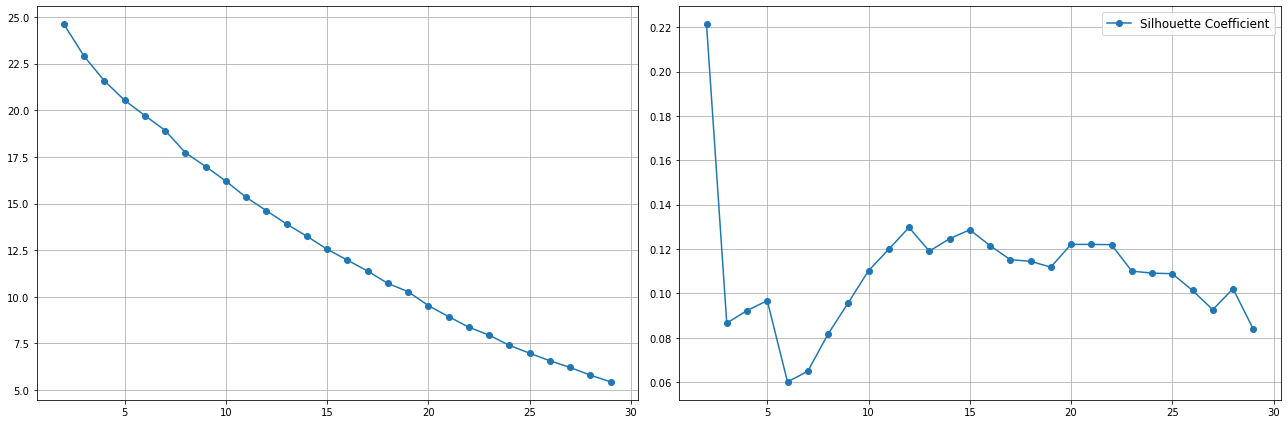

In [93]:
# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].plot(clusters, inertias, 'o-', label='Sum of Squared Distances')
ax[0].grid(True)
ax[1].plot(clusters, silhouettes, 'o-', label='Silhouette Coefficient')
ax[1].grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### ↑ Base on the elbow plot and Silhouette  score. I think K=16 is the best choice

In [94]:
#build a new K-means, K=16
kmeans = KMeans(n_clusters=16, init='k-means++', random_state=42, n_jobs=-1)
kmeans = kmeans.fit(item_item_similarity)
label = kmeans.predict(item_item_similarity)

In [95]:
# PCA for dimension reduction
pca = PCA(n_components=2, random_state=42)
pca = pca.fit(item_item_similarity)
pca_feature = pca.transform(item_item_similarity)

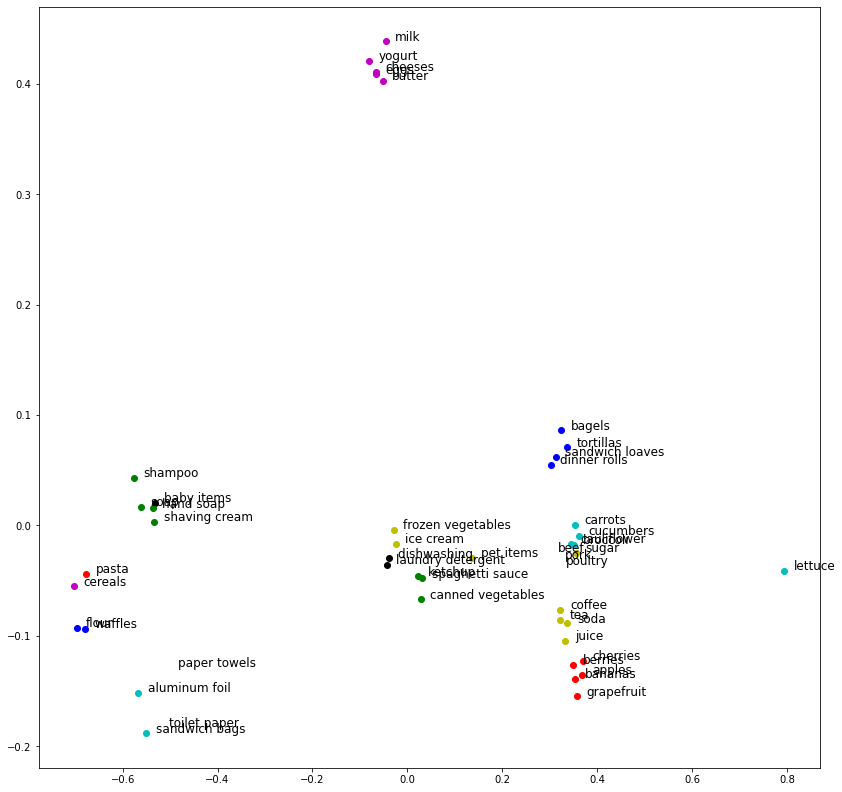

In [98]:
# visualization in 2D
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig, ax = plt.subplots(figsize=(14, 14))
for j in range(len(pca_feature)):
    x = pca_feature[j][0]
    y = pca_feature[j][1]
    ax.plot(x, y, 'o', color=colors[label[j] % 8])
    name = df_item[df_item['Item_id'] == j + 1]['Item_name']
    ax.annotate(xy=(x+0.02, y+0.001), s=name.values[0], fontsize=12)

plt.show()

In [111]:
# 16 clusters
df = pd.DataFrame({'Item_id': list(range(1, 49)), 'cluster': label})
df = pd.merge(left=df, right=df_item, on='Item_id', how='left')

for i in range(0, 16):
    print(i, '\t', list(df[df['cluster'] == i]['Item_name']))

0 	 ['bagels', 'tortillas', 'dinner rolls', 'sandwich loaves']
1 	 ['shampoo', 'shaving cream', 'hand soap', 'soap']
2 	 ['grapefruit', 'cherries', 'apples', 'berries', 'bananas']
3 	 ['sandwich bags', 'aluminum foil']
4 	 ['butter', 'eggs', 'milk', 'cheeses', 'yogurt']
5 	 ['sugar', 'pet items', 'frozen vegetables', 'ice cream']
6 	 ['baby items']
7 	 ['poultry', 'beef', 'pork']
8 	 ['waffles', 'flour']
9 	 ['spaghetti sauce', 'canned vegetables', 'ketchup']
10 	 ['pasta']
11 	 ['lettuce', 'carrots', 'cucumbers', 'broccoli', 'cauliflower']
12 	 ['cereals']
13 	 ['soda', 'tea', 'juice', 'coffee']
14 	 ['laundry detergent', 'dishwashing\xa0']
15 	 ['paper towels', 'toilet paper']
